In [7]:
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
import librosa.display

sr=44100

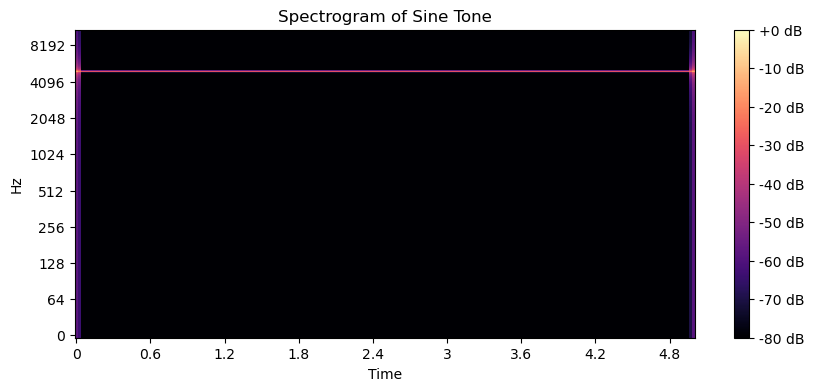

In [11]:
speech_filename = 'TheBrownFox.wav'
speech_sr, speech_data = read(speech_filename)

sr = speech_sr
duration = len(speech_data) / sr

t = np.arange(0, duration, 1/sr)
frequency = 5000
sine_wave = np.sin(2 * np.pi * frequency * t)

sd.play(sine_wave, samplerate=sr)
sd.wait()

# Convert to 16-bit integer
sine_wave_int = (sine_wave * 32767).astype(np.int16)

write(f'CharpPinaWest-sinetone.wav', sr, sine_wave_int)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(sine_wave)), ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Sine Tone')
plt.show()